<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/Modis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymodis rasterio geopandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 27.5 MB/s eta 0:00:00


In [15]:
!pip install gdal

In [30]:
!apt-get install hdf5-tools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  hdf5-tools
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 347 kB of archives.
After this operation, 1,255 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 hdf5-tools amd64 1.10.7+repack-4ubuntu2 [347 kB]
Fetched 347 kB in 1s (554 kB/s)
Selecting previously unselected package hdf5-tools.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../hdf5-tools_1.10.7+repack-4ubuntu2_amd64.deb ...
Unpacking hdf5-tools (1.10.7+repack-4ubuntu2) ...
Setting up hdf5-tools (1.10.7+repack-4ubuntu2) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!echo "machine urs.earthdata.nasa.gov login bhojbist11 password yyPgwM5;7mm*}x#" > ~/.netrc
!chmod 600 ~/.netrc


In [43]:
from pymodis import downmodis
import h5py
import os
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import from_origin

# Step 1: Download the data for February 1, 2024
destination = "/content/MODIS_dataa"
tiles = "h25v06,h26v06"  # MODIS tiles covering Nepal
start_date = "2024-02-01"
end_date = "2024-02-10"

modis_downloader = downmodis.downModis(
    destinationFolder=destination,
    tiles=tiles,
    product="MOD11A1.061",
    today=start_date,
    enddate=end_date

modis_downloader.connect()
modis_downloader.downloadsAllDay()


print(f"Downloaded files:")
os.system(f"ls {destination}")

Downloaded files:


0

In [ ]:

print(f"Downloaded files:")
os.system(f"ls {destination}")

In [47]:
import os


print(os.listdir("/content/MODIS_dataa"))


['MOD11A1.A2024035.h25v06.061.2024039072947.hdf.xml', 'MOD11A1.A2024040.h26v06.061.2024044053134.hdf.xml', 'MOD11A1.A2024036.h25v06.061.2024039212638.hdf', 'MOD11A1.A2024038.h25v06.061.2024040055238.hdf', 'MOD11A1.A2024035.h25v06.061.2024039072947.hdf', 'MOD11A1.A2024036.h25v06.061.2024039212638.hdf.xml', 'MOD11A1.A2024032.h26v06.061.2024038080444.hdf', 'MOD11A1.A2024034.h25v06.061.2024039060507.hdf', 'MOD11A1.A2024032.h26v06.061.2024038080444.hdf.xml', 'MOD11A1.A2024035.h26v06.061.2024039065853.hdf.xml', 'MOD11A1.A2024034.h25v06.061.2024039060507.hdf.xml', 'MOD11A1.A2024040.h25v06.061.2024044053150.hdf.xml', 'MOD11A1.A2024039.h26v06.061.2024040135509.hdf.xml', 'MOD11A1.A2024038.h26v06.061.2024040052107.hdf.xml', 'MOD11A1.A2024033.h25v06.061.2024038084140.hdf', 'MOD11A1.A2024034.h26v06.061.2024039054534.hdf', 'MOD11A1.A2024032.h25v06.061.2024038080611.hdf.xml', 'MOD11A1.A2024036.h26v06.061.2024039212736.hdf', 'MOD11A1.A2024032.h25v06.061.2024038080611.hdf', 'listfileMOD11A1.061.txt', '

In [51]:
!pip install --upgrade h5py

[('HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:LST_Day_1km', '[1200x1200] LST_Day_1km MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)'), ('HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:QC_Day', '[1200x1200] QC_Day MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)'), ('HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:Day_view_time', '[1200x1200] Day_view_time MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)'), ('HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:Day_view_angl', '[1200x1200] Day_view_angl MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)'), ('HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:LST_Night_1km', '[1200x1200] LST_Night_1km MODIS_Grid_Daily_1k

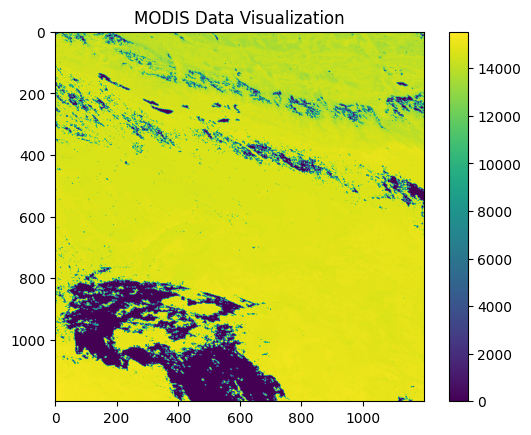

In [56]:
from osgeo import gdal

hdf_file = '/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf'

# Open the HDF file with GDAL
dataset = gdal.Open(hdf_file)

# Check the available subdatasets
subdatasets = dataset.GetSubDatasets()
print(subdatasets)

# Access a specific subdataset (replace the index with the actual one you want)
subdataset = gdal.Open(subdatasets[0][0])

# Read the data
data = subdataset.ReadAsArray()

# Plot the data
import matplotlib.pyplot as plt
plt.imshow(data, cmap='viridis')
plt.colorbar()
plt.title('MODIS Data Visualization')
plt.show()


Total subdatasets available: 12
Processing Subdataset 1: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:LST_Day_1km - [1200x1200] LST_Day_1km MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)


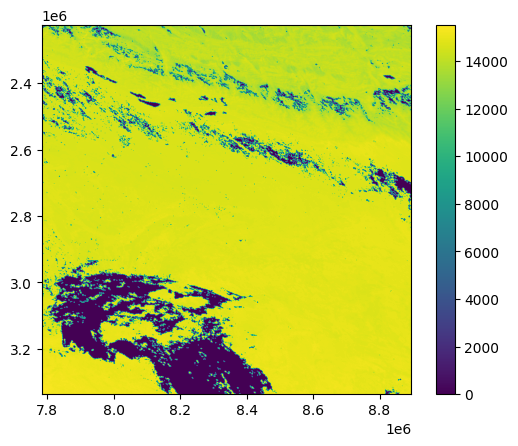

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 0, 15535
--------------------------------------------------
Processing Subdataset 2: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:QC_Day - [1200x1200] QC_Day MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)


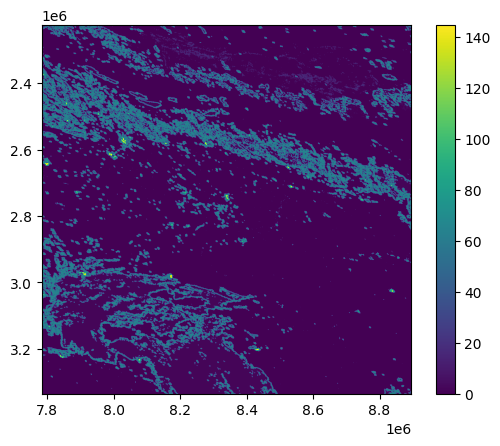

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 0, 145
--------------------------------------------------
Processing Subdataset 3: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:Day_view_time - [1200x1200] Day_view_time MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)


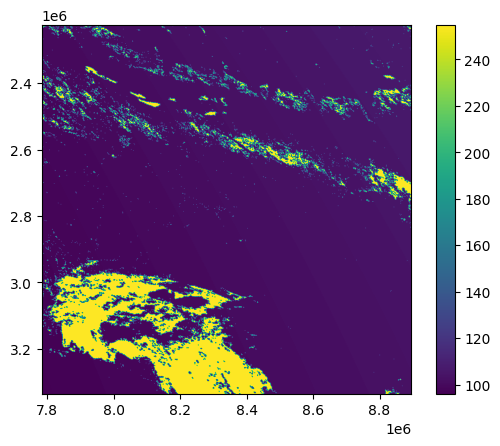

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 96, 255
--------------------------------------------------
Processing Subdataset 4: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:Day_view_angl - [1200x1200] Day_view_angl MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)


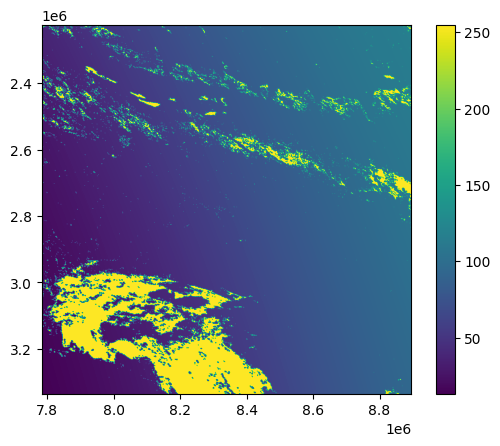

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 13, 255
--------------------------------------------------
Processing Subdataset 5: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:LST_Night_1km - [1200x1200] LST_Night_1km MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)


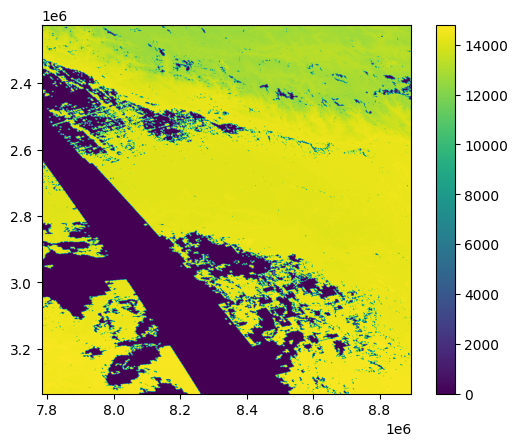

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 0, 14807
--------------------------------------------------
Processing Subdataset 6: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:QC_Night - [1200x1200] QC_Night MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)


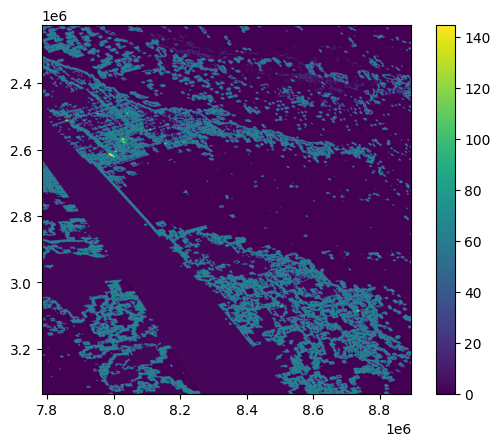

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 0, 145
--------------------------------------------------
Processing Subdataset 7: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:Night_view_time - [1200x1200] Night_view_time MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)


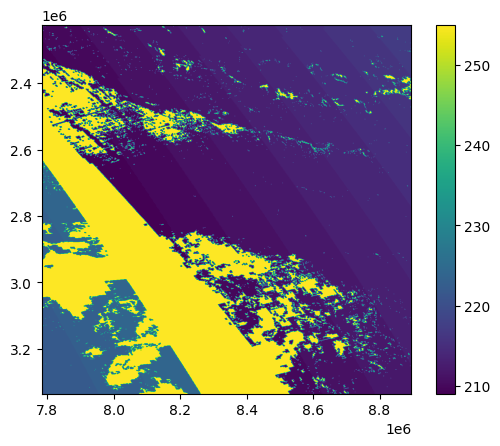

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 209, 255
--------------------------------------------------
Processing Subdataset 8: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:Night_view_angl - [1200x1200] Night_view_angl MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)


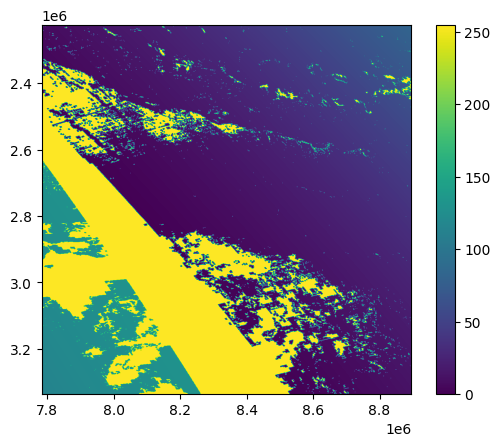

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 0, 255
--------------------------------------------------
Processing Subdataset 9: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:Emis_31 - [1200x1200] Emis_31 MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)


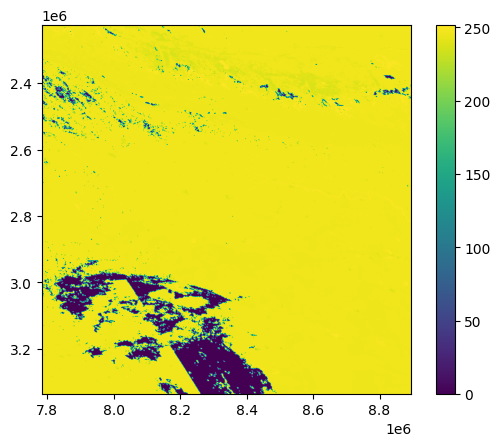

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 0, 252
--------------------------------------------------
Processing Subdataset 10: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:Emis_32 - [1200x1200] Emis_32 MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)


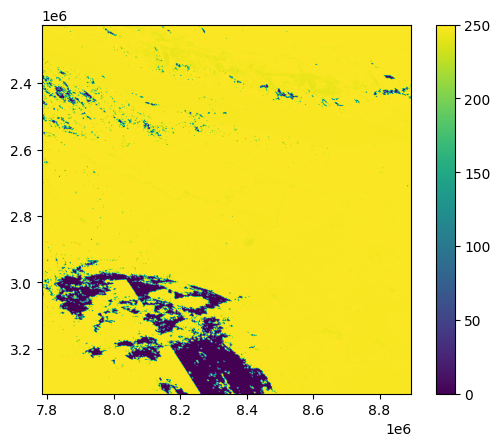

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 0, 250
--------------------------------------------------
Processing Subdataset 11: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:Clear_day_cov - [1200x1200] Clear_day_cov MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)


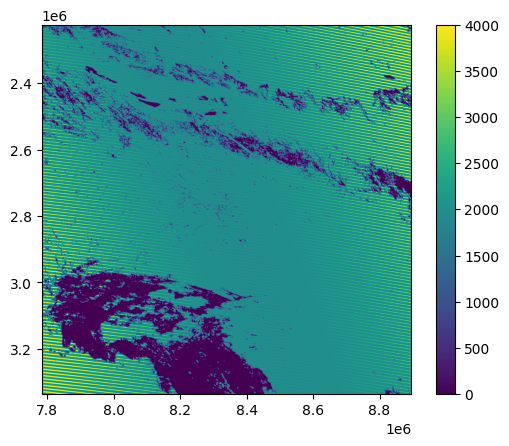

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 0, 4000
--------------------------------------------------
Processing Subdataset 12: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:Clear_night_cov - [1200x1200] Clear_night_cov MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)


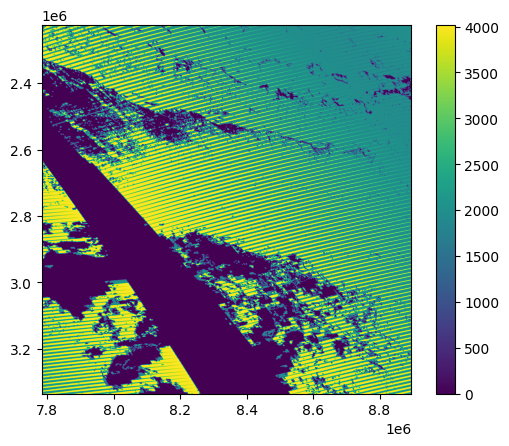

Projection: PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
GeoTransform: (7783653.638366, 926.6254331383334, 0.0, 3335851.5593, 0.0, -926.6254331391666)
Data Shape: (1200, 1200)
Data Min/Max: 0, 4022
--------------------------------------------------


In [59]:
from osgeo import gdal
import matplotlib.pyplot as plt
from rasterio.transform import from_origin

# Path to your HDF file
hdf_file = '/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf'

# Open the HDF file with GDAL
dataset = gdal.Open(hdf_file)

# Check the available subdatasets
subdatasets = dataset.GetSubDatasets()
print(f"Total subdatasets available: {len(subdatasets)}")

# Loop through each subdataset and visualize it
for idx, subdataset_info in enumerate(subdatasets):
    subdataset_name, subdataset_desc = subdataset_info
    print(f"Processing Subdataset {idx + 1}: {subdataset_name} - {subdataset_desc}")

    # Open the subdataset
    subdataset = gdal.Open(subdataset_name)

    # Read the data
    data = subdataset.ReadAsArray()

    # Get geotransform and projection from the subdataset
    geotransform = subdataset.GetGeoTransform()
    projection = subdataset.GetProjection()

    # Extract the parameters from the geotransform
    origin_x = geotransform[0]
    origin_y = geotransform[3]
    pixel_width = geotransform[1]
    pixel_height = geotransform[5]

    # Create a transform using rasterio
    transform = from_origin(origin_x, origin_y, pixel_width, pixel_height)

    # Plot the data with geospatial referencing
    plt.imshow(data, cmap='viridis',
               extent=(origin_x, origin_x + pixel_width * data.shape[1], origin_y, origin_y + pixel_height * data.shape[0])
               )
    plt.colorbar()
    # plt.title(f"MODIS Data Visualization: {subdataset_name}\nProjection: {projection}")
    plt.show()

    # Print additional information
    print(f"Projection: {projection}")
    print(f"GeoTransform: {geotransform}")
    print(f"Data Shape: {data.shape}")
    print(f"Data Min/Max: {data.min()}, {data.max()}")
    print("-" * 50)



In [62]:
import csv
import numpy as np
from osgeo import gdal
import os

# Path to your HDF file
hdf_file = '/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf'

# Open the HDF file with GDAL
dataset = gdal.Open(hdf_file)

# Check the available subdatasets
subdatasets = dataset.GetSubDatasets()
print(f"Total subdatasets available: {len(subdatasets)}")

# Prepare the folder to store the CSV files
output_folder = "/content/subdataset_csv_files"
os.makedirs(output_folder, exist_ok=True)

# Loop through each subdataset and extract the pixel values
for idx, subdataset_info in enumerate(subdatasets):
    subdataset_name, subdataset_desc = subdataset_info
    print(f"Processing Subdataset {idx + 1}: {subdataset_name} - {subdataset_desc}")

    # Open the subdataset
    subdataset = gdal.Open(subdataset_name)

    # Read the data
    data = subdataset.ReadAsArray()

    # Get geotransform and projection from the subdataset
    geotransform = subdataset.GetGeoTransform()
    projection = subdataset.GetProjection()

    # Extract the parameters from the geotransform
    origin_x = geotransform[0]
    origin_y = geotransform[3]
    pixel_width = geotransform[1]
    pixel_height = geotransform[5]

    # Generate a unique CSV filename for this subdataset
    subdataset_filename = os.path.join(output_folder, f"subdataset_{idx + 1}_pixel_values.csv")

    # Open CSV file in write mode
    with open(subdataset_filename, mode='w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write the header with the subdataset description and its dimensions
        writer.writerow([f"Subdataset: {subdataset_name} - {subdataset_desc}"])
        writer.writerow([f"Projection: {projection}"])
        writer.writerow([f"GeoTransform: {str(geotransform)}"])
        writer.writerow(["Row", "Column", "Pixel Value"])

        # Iterate over all pixels and write their value in the CSV
        rows, cols = data.shape
        for row in range(rows):
            for col in range(cols):
                pixel_value = data[row, col]
                writer.writerow([row, col, pixel_value])

    print(f"Pixel values for {subdataset_name} have been saved to {subdataset_filename}")

print(f"All pixel values have been saved to individual CSV files in {output_folder}")


Total subdatasets available: 12
Processing Subdataset 1: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:LST_Day_1km - [1200x1200] LST_Day_1km MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)
Pixel values for HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:LST_Day_1km have been saved to /content/subdataset_csv_files/subdataset_1_pixel_values.csv
Processing Subdataset 2: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:QC_Day - [1200x1200] QC_Day MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)
Pixel values for HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061.2024044064340.hdf":MODIS_Grid_Daily_1km_LST:QC_Day have been saved to /content/subdataset_csv_files/subdataset_2_pixel_values.csv
Processing Subdataset 3: HDF4_EOS:EOS_GRID:"/content/MODIS_dataa/MOD11A1.A2024041.h25v06.061